Use the Train.csv dataset for a detailed analysis of sales patterns.
Explore relationships between product attributes and their sales performance.
Examine how location, time of year, and other factors influence sales trends.
Develop models to predict future sales trends based on your analysis.
Create a comprehensive report highlighting your analytical process and findings.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Step 1 :  Data processing

In [2]:
df=pd.read_csv("C:/Users/Admin/Downloads/Team Project Dir _ Datasets/BigMart Sales Analysis/Train.csv")

In [3]:
df.head(60)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
df[df['Item_Fat_Content']=='reg'].count() #2889+5089+316 + 112+117 =8523

Item_Identifier              117
Item_Weight                  106
Item_Fat_Content             117
Item_Visibility              117
Item_Type                    117
Item_MRP                     117
Outlet_Identifier            117
Outlet_Establishment_Year    117
Outlet_Size                   82
Outlet_Location_Type         117
Outlet_Type                  117
Item_Outlet_Sales            117
dtype: int64

In [5]:
df['Item_Identifier'].nunique()

1559

In [6]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

After finding missing values in big mart sales train dataset we got null values present in item_weight and outlet_size we can remove this by mode (most occurance value )of item_weight and outlet_size respectively.

In [8]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
df.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [12]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


# step2: Data Cleaning

In [13]:
mode_wight=df['Item_Weight'].mode().iloc[0]

In [14]:
#we can clean the missing value by putting most occurance value of the respected column
df['Item_Weight'].fillna(mode_wight,inplace=True)

In [15]:
mode_size=df['Outlet_Size'].mode().iloc[0]

In [16]:
df['Outlet_Size'].fillna(mode_size,inplace=True)

In [17]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [18]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [19]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [20]:
df.kurtosis()

C:\Users\Admin\AppData\Local\Temp/ipykernel_13912/615572439.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurtosis()


Item_Weight                 -0.861945
Item_Visibility              1.679445
Item_MRP                    -0.889769
Outlet_Establishment_Year   -1.205694
Item_Outlet_Sales            1.615877
dtype: float64

In [21]:
df.skew()

C:\Users\Admin\AppData\Local\Temp/ipykernel_13912/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Item_Weight                  0.175321
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

# Step3 : Exploratry Data Analysis(EDA):

# 1.Analyze the distribution of sales by histogram and descriptive stats.

In [22]:
#This is the summary Statistics of target variable(sales).
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

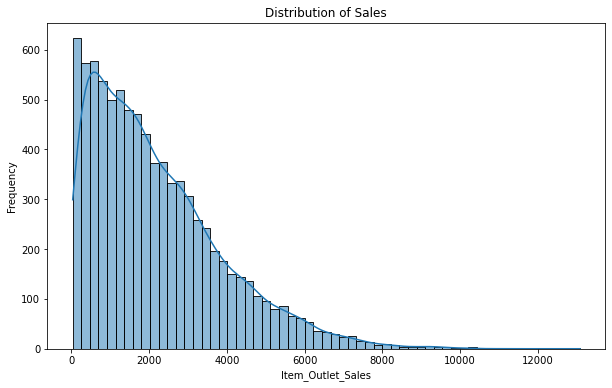

In [23]:
#visualize the distribution of sales using histogram
plt.figure(figsize=(10,6))
sns.histplot(df['Item_Outlet_Sales'],kde=True)
plt.title("Distribution of Sales")
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Frequency")
plt.show()

# 2.Explore Relationships with Numerical Features:

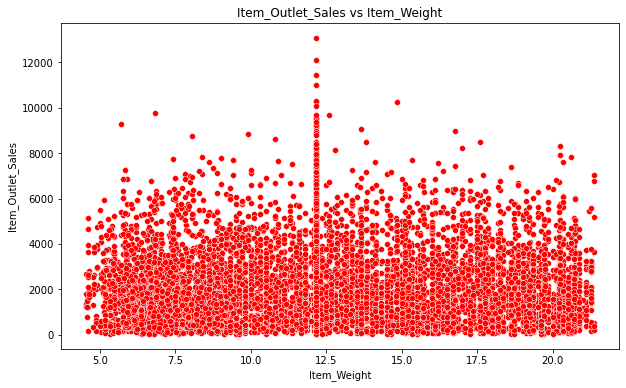

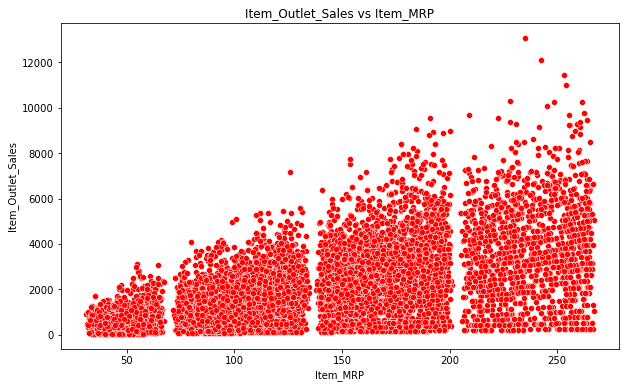

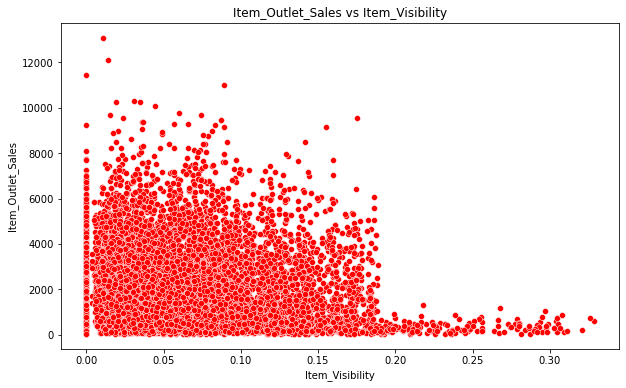

In [24]:
#Select relevant numerical features and visualize their relationship with sales using scatter plots:
numerical_features = ['Item_Weight','Item_MRP','Item_Visibility']

for i in numerical_features:
    
        plt.figure(figsize=(10,6))
        sns.scatterplot(x=i,y='Item_Outlet_Sales',data=df,color='red')
        plt.subplot()
        plt.title(f'Item_Outlet_Sales vs {i}')
        plt.xlabel(i)
        plt.ylabel('Item_Outlet_Sales')
   
        plt.show()


# 3.Explore Realtionship with categorical data

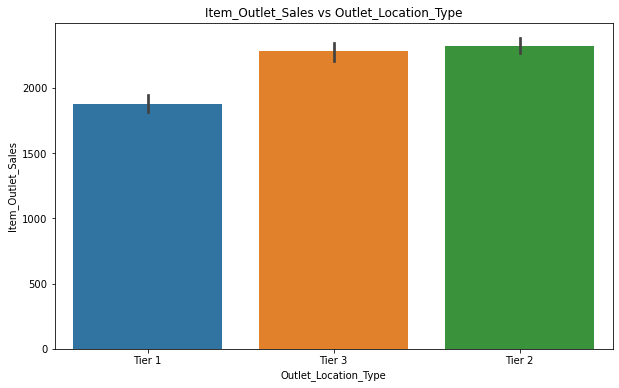

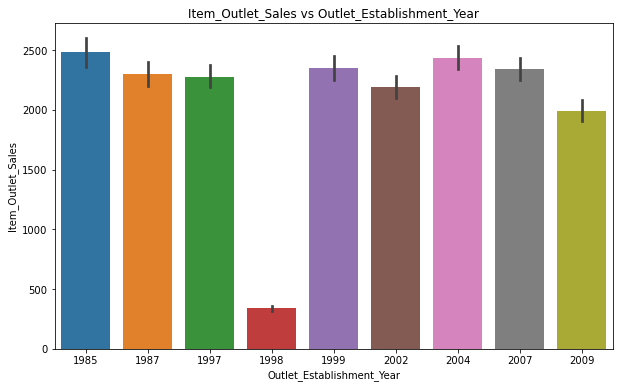

In [25]:
#Select relevant categorical features eg.location etc and visualize their impact on sales using bar plots or box plots:
Categorical_features=['Outlet_Location_Type','Outlet_Establishment_Year']
for i in Categorical_features:
    plt.figure(figsize=(10,6))
    sns.barplot(x=i,y='Item_Outlet_Sales',data=df)
    plt.title(f'Item_Outlet_Sales vs {i}')
    plt.xlabel(i)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

# Step 4:Data Visualization:

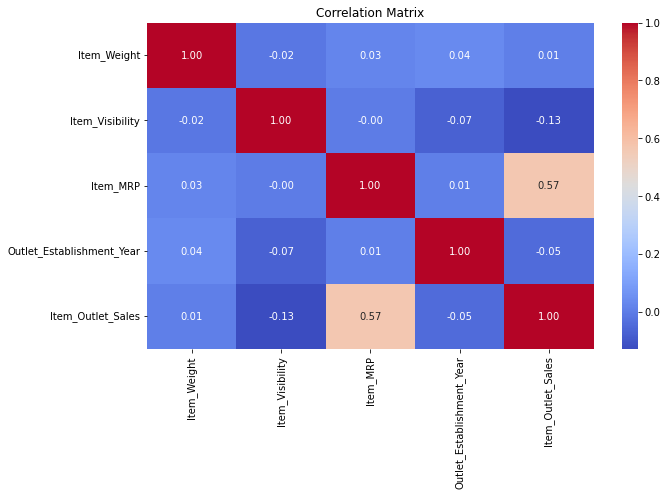

In [26]:
corr_Matrix=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_Matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [27]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# Line Plots:
Line plots are suitable for visualizing trends over time or sequential data.

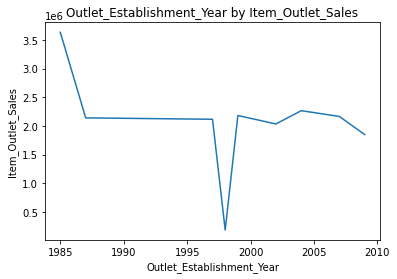

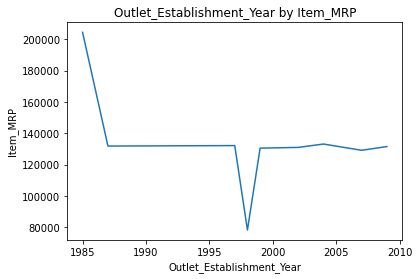

In [28]:
y=['Item_Outlet_Sales','Item_MRP']
for i in y:
    #plt.plot(df['Outlet_Establishment_Year'].unique(),df.groupby("Outlet_Establishment_Year")[i].sum(),data=df)
    sales_By_year=df.groupby("Outlet_Establishment_Year")[i].sum()
    sales_By_year.plot(kind='line')
    plt.title(f'Outlet_Establishment_Year by {i}')
    plt.xlabel("Outlet_Establishment_Year")
    plt.ylabel(i)
    plt.show()

# 2.Bar plots :
bar plots are effective for comparing categorical variables or showing distribution across categories.


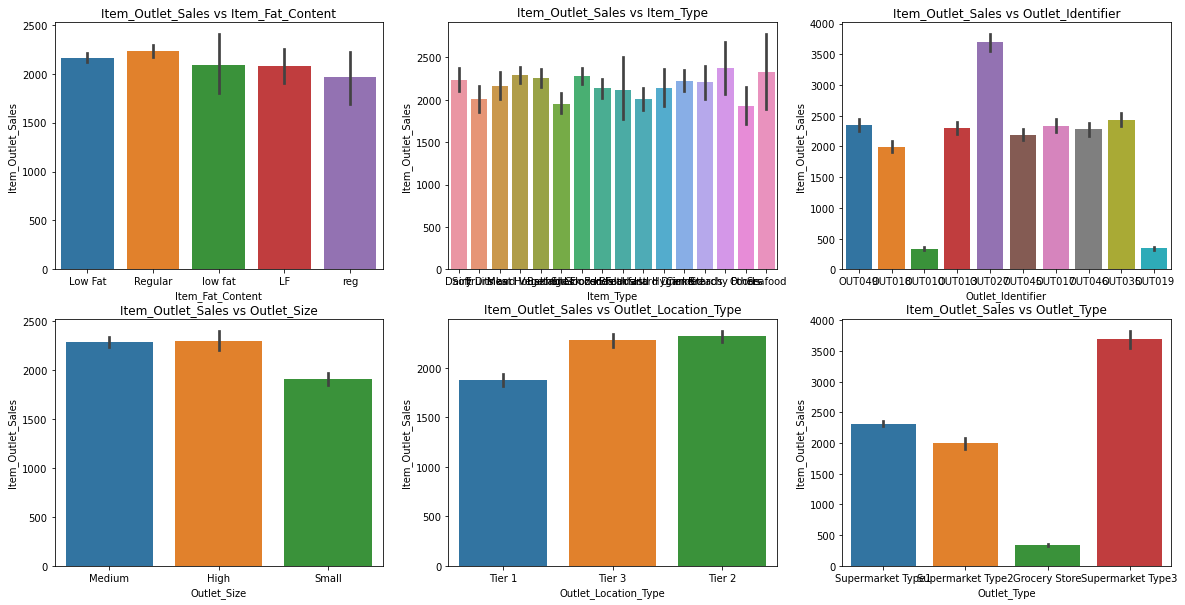

In [29]:
independant_categorical=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
plt.figure(figsize=(20,10))
plotnumber=1
for i in independant_categorical:
    if plotnumber<=6:
        #plt.figure(figsize=(10,6))
        ax=plt.subplot(2,3,plotnumber)
        sns.barplot(x=i,y='Item_Outlet_Sales',data=df)
        plt.title(f'Item_Outlet_Sales vs {i}')
        plt.ylabel('Item_Outlet_Sales')
        plt.xlabel(i)
    plotnumber +=1
plt.show()

    

In [30]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

# Box Plots:
Box plots are useful for visualizing the distribution of numerical data and identifying outliers.

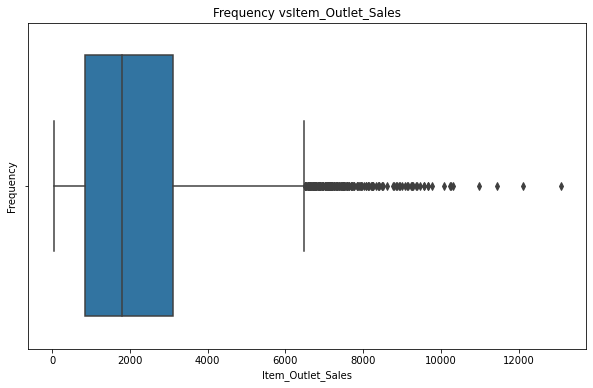

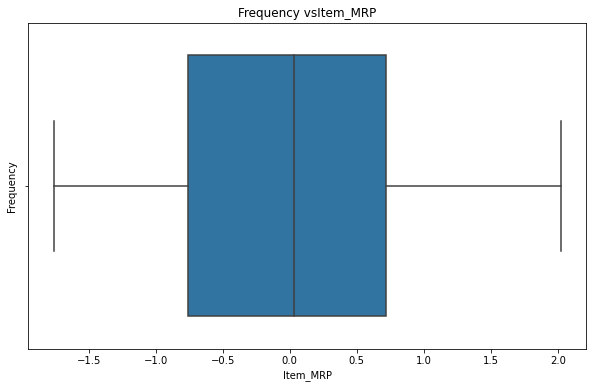

In [45]:
feutures_col=['Item_Outlet_Sales','Item_MRP' ]
for i in feutures_col:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=i,data=df)
    plt.title(f'Frequency vs{i}')
    plt.ylabel("Frequency")
    plt.xlabel(i)
    plt.show()

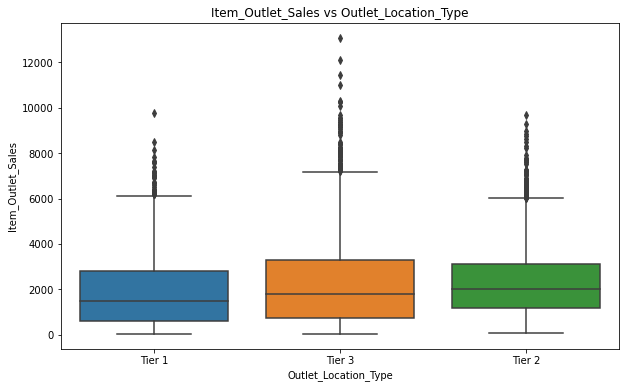

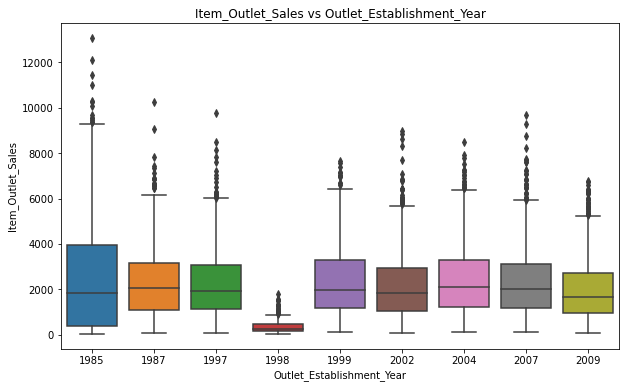

In [32]:
Categorical_features=['Outlet_Location_Type','Outlet_Establishment_Year']
for i in Categorical_features:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=i,y='Item_Outlet_Sales',data=df)
    plt.title(f'Item_Outlet_Sales vs {i}')
    plt.xlabel(i)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

# Step 5:Statistical Analysis
Conduct statistical tests to determine the significance of factors such as location, time of year, or product attributes on sales.

Use techniques like ANOVA  to quantify the impact of these factors on sales.

Data Preprocessing:
Encode categorical variables using one-hot encoding.

In [33]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [34]:
Dairy_Sales=df[df['Item_Type']=='Dairy']['Item_Outlet_Sales']
Household_Sales=df[df['Item_Type']=='Household']['Item_Outlet_Sales']
Health_Sales=df[df['Item_Type']=='Health and Hygine']['Item_Outlet_Sales']
Others_Sales=df[df['Item_Type']=='Others']['Item_Outlet_Sales']
Canned_Sales=df[df['Item_Type']=='Canned']['Item_Outlet_Sales']

In [35]:
Dairy_Sales

0       3735.1380
11      2187.1530
19      2748.4224
28       178.4344
30       163.7868
          ...    
8424    3739.1328
8447    7588.1226
8448    2093.9410
8457    1516.6924
8512    2479.4392
Name: Item_Outlet_Sales, Length: 682, dtype: float64

In [36]:
#perform ANOVA TEST
from scipy import stats
item_categories=['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood']
categories_sales = []

# Iterate over each category
for category in item_categories:
    # Filter sales data for the current category
    category_sales = df[df['Item_Type'] == category]['Item_Outlet_Sales']
    if len(category_sales) > 0:
        # Add the category sales data to the list
        categories_sales.append(category_sales)

# Perform ANOVA test if there is data available for at least two categories
if len(categories_sales) > 1:
    # Perform ANOVA test
    f_stat, p_val = stats.f_oneway(*categories_sales)
    
    print("\nANOVA Results:")
    print("F-statistics:", f_stat)
    print("P-value:", p_val)
    
    # Check for significance
    alpha = 0.05
        
    if p_val < alpha:
            print("Reject null hypothesis: At least one Item Type has a significant difference in Item Outlet Sales between Items.")
    else:
            print("Fail to reject null hypothesis: There is no significant difference in sales between Items.")

else:
        print("Insufficient data available for ANOVA test.")
                                


ANOVA Results:
F-statistics: 2.700653287521041
P-value: 0.00038843993766501125
Reject null hypothesis: At least one Item Type has a significant difference in Item Outlet Sales between Items.


# Step6:Machine Learning Modeling

Model Selection and Training:
Choose appropriate regression models like linear regression, decision tree regression, or random forest regression.
Train the models using the training dataset.
Model Evaluation:
Evaluate the models' performance using metrics like mean squared error (MSE) or R-squared.
Model Validation:
Validate the models' performance using cross-validation techniques if necessary.
Forecasting Future Sales:
Use the trained models to predict future sales trends based on new data.


# 1.Data Preprocessing

In [37]:
#1.see the missing values present in any one of the columns
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [38]:
#2.Encode Categorical Variables by label encoding 
from sklearn.preprocessing import LabelEncoder
# Define nominal and ordinal columns
nominal_cols = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type']
ordinal_cols = ['Outlet_Size', 'Outlet_Establishment_Year']

# Apply label encoding to ordinal columns
label_encoder = LabelEncoder()
for col in ordinal_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Apply one-hot encoding to nominal columns
df = pd.get_dummies(df, columns=nominal_cols)

# Display the updated dataframe
print(df.head())

   Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0         9.30         0.016047  249.8092                          4   
1         5.92         0.019278   48.2692                          8   
2        17.50         0.016760  141.6180                          4   
3        19.20         0.000000  182.0950                          3   
4         8.93         0.000000   53.8614                          1   

   Outlet_Size  Item_Outlet_Sales  Item_Identifier_DRA12  \
0            1          3735.1380                      0   
1            1           443.4228                      0   
2            1          2097.2700                      0   
3            1           732.3800                      0   
4            0           994.7052                      0   

   Item_Identifier_DRA24  Item_Identifier_DRA59  Item_Identifier_DRB01  ...  \
0                      0                      0                      0  ...   
1                      0                      0 

In [39]:
df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,4,1,3735.1380,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,8,1,443.4228,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,17.500,0.016760,141.6180,4,1,2097.2700,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,3,1,732.3800,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.930,0.000000,53.8614,1,0,994.7052,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1,0,2778.3834,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
8519,8.380,0.046982,108.1570,5,1,549.2850,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
8520,10.600,0.035186,85.1224,6,2,1193.1136,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
8521,7.210,0.145221,103.1332,8,1,1845.5976,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [40]:
#3.Feature scaling
from sklearn.preprocessing import StandardScaler

# Define numerical columns to scale
numerical_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

# Initialize StandardScaler
scaler = StandardScaler()

# Scale numerical features
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [41]:
df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.811511,-0.970732,1.747454,0.076668,1,3735.1380,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,-1.609756,-0.908111,-1.489023,1.541783,1,443.4228,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1.125058,-0.956917,0.010040,0.076668,1,2097.2700,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,1.526542,-1.281758,0.660050,-0.289611,1,732.3800,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,-0.898893,-1.281758,-1.399220,-1.022168,0,994.7052,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.386578,-0.181193,1.180783,-1.022168,0,2778.3834,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
8519,-1.028785,-0.371154,-0.527301,0.442947,1,549.2850,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
8520,-0.504494,-0.599784,-0.897208,0.809225,2,1193.1136,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
8521,-1.305100,1.532880,-0.607977,1.541783,1,1845.5976,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


# 2.Model selection:
we are selcting multiple regression analysis as it has multiple independant variable and 1 dependant variable as a target variable

In [42]:
X = df.drop('Item_Outlet_Sales', axis=1)
Y = df['Item_Outlet_Sales']

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [47]:
print("Model Coeffiecient (m) :",model.coef_)
print("Model Coeffiecient (b) :",model.intercept_)

Model Coeffiecient (m) : [ 1.12618237e+01 -1.80124711e+01 -7.02602113e+02 ... -4.85296856e+13
  6.78216989e+13 -2.08184534e+14]
Model Coeffiecient (b) : -213396720544142.34


# 3.Model Training and Evaluation:

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
X = df.drop(columns=['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = reg_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)


Mean Squared Error (MSE): 1.7060165426555674e+23
Mean Absolute Error (MAE): 25849441050.957127
R-squared (R^2): -6.276804014913912e+16


Based on the evaluation metrics, it is evident that the regression model is performing extremely poorly.

The large values of MSE and MAE indicate that the model's predictions are highly inaccurate, while the negative R-squared suggests that the model does not explain any variance in the target variable.

It is crucial to re-evaluate the model, revisit the feature selection process, explore different algorithms, and potentially address any data preprocessing issues to improve the model's performance.

# 4.Model tuning:
Hyperparameter tuning using techniques like grid search or random search, along with cross-validation, is a crucial step to optimize the performance of machine learning models. Here's how you can perform model tuning using these techniques:

Use cross-validation to assess the model's generalization performance and reduce overfitting.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor


# Define the regression model with chosen hyperparameters
model_new = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1)

# Perform cross-validation with the model
cv_scores = cross_val_score(model_new, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
# Convert negative mean squared error to positive and compute mean
mse_scores = -cv_scores
mean_mse = mse_scores.mean()
print(mean_mse)

while an MSE of 1,324,846.86 provides insight into the average squared difference between predicted and actual values, further analysis and context-specific considerations are necessary to fully evaluate the model's performance and determine its suitability for the given task.

# 5.Model Interpretation:
Interpreting trained regression models involves understanding the relationship between input features and the target variable

Linear Regression Models:

For linear regression models, you can examine the coefficients of the features to understand their impact on the target variable.

Positive coefficients indicate a positive correlation with the target variable, meaning an increase in the feature value leads to an increase in the target variable.

Negative coefficients indicate a negative correlation with the target variable, meaning an increase in the feature value leads to a decrease in the target variable.

The magnitude of the coefficient represents the strength of the relationship.

In [ ]:
# Extract coefficients from the trained linear regression model
coefficients = reg_model.coef_

# Create a DataFrame to display the coefficients with corresponding feature names
coefficients_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Sort the coefficients by absolute value to identify the most influential features
coefficients_df['Absolute_Coefficient'] = abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the coefficients
print(coefficients_df)


1.High Coefficients (e.g., 7.921721e+14):

Features with extremely high coefficients indicate a strong linear relationship with the target variable(Item_Outlet_Sales).
However, such large coefficients are unusual and may be indicative of issues such as multicollinearity or improper feature scaling.

2.Negative Coefficients (e.g., -1.801247e+01):

Negative coefficients suggest a negative correlation between the feature and the target variable(Item_Outlet_Sales).
In this case, a decrease in the feature value leads to an increase in the target variable (or vice versa).

3.Low Coefficients (e.g., -2.501110e-12):

Small coefficients close to zero suggest a weak linear relationship between the feature and the target variable.
These features may have minimal impact on predicting the target variable.